# Rejection Sampling

The idea behind rejection sampling is to sample from a distribution of interest by sampling uniformally under its desnity function. This is useful if your distribution of interest is computationally intractable. 

More formally, suppose sampling from distribution f(x) is difficult. There must exist another distribution g(x) from which we can easily sample. To do this, we can reject samples that are outside of f(x) and accept those that are within its boundaries.

The algorithm is as follows:

1. Draw from $$U \sim Uniform(0, 1)$$
2. Draw from $$X \sim g(x)$$
3. If $$ U \leq \frac{f(x)}{c * g(x)}$$
then accept the sample, otherwise reject it. 

The "c" constant here helps adjust the candidate distribution g(x) so it can enevelop f(x).

## Imports
Our imports include the scipy library that contains the functions that define the density functions of both the uniform and beta distributions.

In [15]:
import numpy as np
from scipy.stats import beta as beta_dist
from scipy.stats import uniform as uniform_dist
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Code

The code below uses the uniform distribution as our candidate g(x) to sample from the distribution of interest f(x). This code uses a variant of rejection sampling known as "Empirical Supremum Rejection Sampling", which interatively updates the constant C based on the ratio of f(x) and g(x).

In [20]:
C = 2
a = 0
b = 1
alpha = 2
beta = 2

samples = []

for i in range(10000):
    U = np.random.uniform(0, 1)
    X = np.random.uniform(a, b)
    interest_dist = beta_dist.pdf(X, alpha, beta)
    candidate_dist = uniform_dist.pdf(X, a, b)
    if U <= (interest_dist / (C * candidate_dist)):
      samples.append(X)
    C_next = max(C, interest_dist / candidate_dist)
    C = C_next

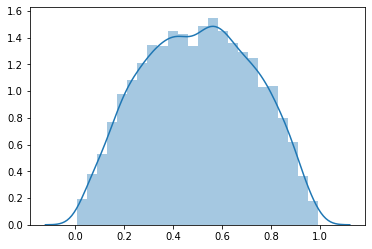

In [21]:
sns.distplot(samples)